<a href="https://githubtocolab.com/gee-community/geemap/blob/master/docs/notebooks/118_download_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

**Download images directly to a local computer**

Uncomment the following line to install [geemap](https://geemap.org) if needed.

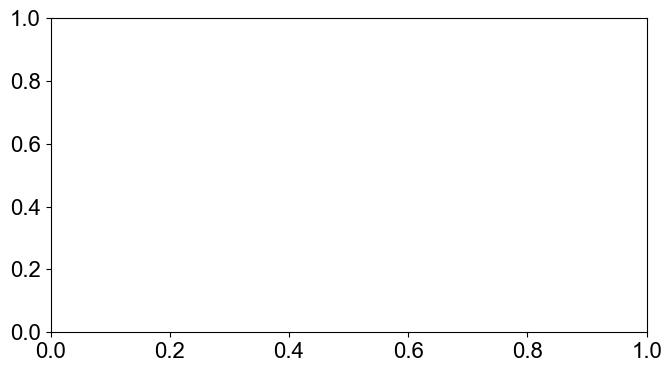

In [527]:
# 在jupyter中开启matplotlib交互式绘图模式
# %matplotlib ipympl
%matplotlib inline

import numpy as np
import seaborn as sns
from matplotlib import ticker
import warnings

warnings.filterwarnings("ignore")
# conding=utf8
import os

# import janitor
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# plt.rc('font',family='Arial') #'Times New Roman'
# plt.style.use(['science', 'no-latex'])

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["ps.fonttype"] = 42

plt.rc("font", size=16)

plt.rcParams["axes.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["lines.linewidth"] = 2

# change font
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["font.family"] = "sans-serif"

plt.tick_params(top=False, bottom=True, left=True, right=False)
plt.tick_params(labeltop=False, labelleft=True, labelright=False, labelbottom=True)

plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

visible_ticks = {"top": False, "right": False}
plt.tick_params(axis="x", which="both", **visible_ticks)
plt.show()


In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

# Dir

In [4]:
# out_dir = os.path.expanduser("~/Downloads")
# root = r"E:\NJU\Debris\2024SDG终期报告\Composites"

out_dir = r"E:\NJU\SciBull\Fig\JAP"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

os.chdir(out_dir)


In [603]:
import os
import ee
import geemap

from joblib import Parallel, delayed
from retry import retry

geemap.set_proxy(port=7890)


In [2]:
!earthengine authenticate

^C


Authenticate: Credentials already exist.  Use --force to refresh.


In [604]:
# Initialize Earth Engine
ee.Initialize()
ee.Authenticate()
ee.Initialize(project='zhuxiaobo')

In [616]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [617]:
Tokyo = ee.Geometry.Point(140.02297, 35.58029).buffer(10000).bounds()
Test = ee.Image(1).blend(ee.Image().clip(Tokyo))
Map.addLayer(Test, {}, "Tokyo")

In [448]:
region = Map.user_roi
region.coordinates().getInfo()


AttributeError: 'NoneType' object has no attribute 'coordinates'

In [ ]:
coordinates = [[
  [-232.812538, 36.590335],
  [-233.295976, 35.094236],
  [-233.712184, 34.284453],
  [-233.690197, 33.902336],
  [-233.383874, 33.570175],
  [-233.129884, 33.091542],
  [-232.910161, 32.676373],
  [-232.602532, 32.407792],
  [-232.459723, 32.045333],
  [-232.163088, 31.559815],
  [-232.119145, 31.409912],
  [-232.064214, 31.325487],
  [-231.866451, 31.034108],
  [-231.437989, 30.505484],
  [-230.416236, 29.783449],
  [-210.190196, 29.802518],
  [-210.366207, 46.316584],
  [-233.085927, 46.377254],
  [-233.724193, 39.557315],
  [-232.273878, 37.807936],
  [-232.812538, 36.590335]]]
region = ee.Geometry.Polygon(coordinates, None, False)


## Download a single image

In [ ]:
image = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA").first()
Map.addLayer(image, {}, "Landsat")
Map.centerObject(image)

In [4]:
geemap.download_ee_image(image, "landsat.tif", scale=100)

Consider adjusting `region`, `scale` and/or `dtype` to reduce the landsat.tif download size (raw: 1.02 GB).


landsat.tif: |          | 0.00/1.02G (raw) [  0.0%] in 00:00 (eta:     ?)

Tile downloaded failed, retry 1 of 5.  URL: https://earthengine.googleapis.com/v1/projects/1023951294628/thumbnails/42e4e33eeb605331b88ec80844b0af90-0b75d81d28c9d05f16fd55226d3eff05:getPixels. ('Connection broken: IncompleteRead(3128283 bytes read, 6417693 more expected)', IncompleteRead(3128283 bytes read, 6417693 more expected)).
Tile downloaded failed, retry 1 of 5.  URL: https://earthengine.googleapis.com/v1/projects/1023951294628/thumbnails/79cd528ba297cb1c8e21abe8fb54145f-897ba66b45f1e19ba2cf5c05a6c49a65:getPixels. ('Connection broken: IncompleteRead(922 bytes read, 9842288 more expected)', IncompleteRead(922 bytes read, 9842288 more expected)).


## Download an image collection

FID,Id,Country
1,Java
2,JAP
3,Haiti
4,Missi
5,GOH

In [7]:
# Monthly
# MSI =( ee.ImageCollection("projects/ee-zhuxiaobogee/assets/SDG/SDGV1")
# .filterMetadata('OceanRegion','equals',3)
# .merge(ee.ImageCollection("projects/njumarinedebris/assets/SDG/SDGV1"))
# )

# composite
MSI = ee.ImageCollection("projects/zhuxiaobo/assets/SDG/JAP")

In [ ]:
Name = 'Haiti'
out_dir = os.path.join(root, Name)
collection = MSI.filter(ee.Filter.stringContains('system:index', Name))
vis_collection = collection.map(lambda img: dem.blend(img.visualize(**vis_params)))

In [14]:
geemap.download_ee_image_collection(collection, out_dir, scale=200)
# geemap.download_ee_image_collection(vis_collection, out_dir, scale=200)

Total number of images: 21



Asset-Haiti-HistMean.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-HistMean


Asset-Haiti-Month-01.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-01


Asset-Haiti-Month-02.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-02


Asset-Haiti-Month-03.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-03


Asset-Haiti-Month-04.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-04


Asset-Haiti-Month-05.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-05


Asset-Haiti-Month-06.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-06


Asset-Haiti-Month-07.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-07


Asset-Haiti-Month-08.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-08


Asset-Haiti-Month-09.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-09


Asset-Haiti-Month-10.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-10


Asset-Haiti-Month-11.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-11


Asset-Haiti-Month-12.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Month-12


Asset-Haiti-Year-2016.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2016


Asset-Haiti-Year-2017.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2017


Asset-Haiti-Year-2018.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2018


Asset-Haiti-Year-2019.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2019


Asset-Haiti-Year-2020.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2020


Asset-Haiti-Year-2021.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2021


Asset-Haiti-Year-2022.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2022


Asset-Haiti-Year-2023.tif: |          | 0.00/16.9M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/zhuxiaobo/assets/SDG/JAP/Asset-Haiti-Year-2023


In [ ]:
geemap.get_image_collection_thumbnails(
    vis_collection, out_dir, {}, region=collection.first().geometry(),dimensions=5000, format="png"
)

Total number of images: 21

Total request size (130680000 bytes) must be less than or equal to 50331648 bytes.


# 1 JAP
Params

In [244]:

#Threshold
DebrisTH=1e-5 #month
DebrisHisTH=5e-6 #historical

# Define the region of interest: Japan
japan = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_co', 'JA'))
JAPCoastZone = ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/JAPCoastZone")
jpn_admbnda_adm1_2019 = ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/jpn_admbnda_adm1_2019")

Ocean_Grid= ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/World_Seas_IHO_v3")
Seto = ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/SetoBuffer") # 10km buffer

JAPRegions = ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/JAPRegions") # West East North Seto SetoP TokyoBay
JAPRegionsPWV = ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/JAPRegionsPWV")# 10km buffer of West East North Seto SetoP TokyoBay

# 加载一个DEM数据集 30m
dem = ee.Image("NASA/NASADEM_HGT/001").select('elevation').gt(0).selfMask().unmask().visualize(**{
  'palette': ['#000c16', '#000000'],   #001e36
  'min':0, 'max':1,
})

YlOrRd = ["ffffcc","ffeda0","fed976","feb24c","fd8d3c","fc4e2a","e31a1c","bd0026","800026"]
vis_params={'min':0,'max':DebrisTH,'palette':YlOrRd}

# Define a cool color palette for sequential data
LightBlue_palette = ['#f7fbff',  '#c6dbef', '#6baed6',  '#2171b5', '#08519c', '#08306b', '#2e0854', '#4b0082', '#6a0dad']
# LightBlue_palette = ['#000000', '#031024', '#052047', '#08306b', '#2e0854', '#4b0082', '#6a0dad']
DarkBlue_palette = ['#000000', '#051238', '#091F5E', '#0D2B83', '#1139AB', '#1546D3', '#1A54FF', '#6a0dad', '#4b0082', '#2e0854']

# Define visualization parameters for precipitation
vis_params_precip = {
  'min': 0.0,
  'max': 0.6, 
  'palette':LightBlue_palette# ['lightblue', 'blue', 'purple']
}


# ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],['001137', '01abab', 'e7eb05', '620500']

vis_params_July={'min':0,'max':1e-3,'palette':YlOrRd}
# image = MSI.filter(ee.Filter.stringContains('system:index', 'JAP')).first()
# blend = dem.blend(image.visualize(**vis_params))
# Map.addLayer(blend,None,'blend')
# Map.addLayer(image,{'min':0,'max':DebrisTH,'palette':YlOrRd},'Image')


In [ ]:
import seaborn as sns
# Display the colormap using seaborn
sns.color_palette(LightBlue_palette)

[(0.9686274509803922, 0.984313725490196, 1.0),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.12941176470588237, 0.44313725490196076, 0.7098039215686275),
 (0.03137254901960784, 0.3176470588235294, 0.611764705882353),
 (0.03137254901960784, 0.18823529411764706, 0.4196078431372549),
 (0.1803921568627451, 0.03137254901960784, 0.32941176470588235),
 (0.29411764705882354, 0.0, 0.5098039215686274),
 (0.41568627450980394, 0.050980392156862744, 0.6784313725490196)]

## Image

In [ ]:

collection = ee.ImageCollection("projects/zhuxiaobo/assets/JAP/JAPMapping")
TS = ee.ImageCollection("projects/zhuxiaobo/assets/JAP/TS")

Hist = collection.first().blend(ee.Image().clip()) # Tokyo
Year = collection.filterMetadata("system:index", "contains","Year")
Month = collection.filterMetadata("system:index", "contains","Month")
July = ee.ImageCollection("projects/zhuxiaobo/assets/JAP/JulyMapping")

PWV = ee.ImageCollection("projects/zhuxiaobo/assets/JAP/PWV2")
PWVJuly = PWV.filterMetadata("system:index", "contains","July").first()
PWVTop3Image = PWV.filterMetadata("system:index", "contains","Top3Image").first()
PWVMeanImage = PWV.filterMetadata("system:index", "contains","MeanImage").first()


era5 = (ee.ImageCollection("ECMWF/ERA5_LAND/MONTHLY_AGGR")
              .select('total_precipitation_sum')
              .filterDate('2016-01-01', '2024-12-31')
              .filterBounds(japan))
              
# era5 = (ee.ImageCollection("ECMWF/ERA5/MONTHLY")
#               .select('total_precipitation')
#               .filterDate('2016-01-01', '2024-12-31')
#               .filterBounds(japan))


In [249]:
# Change this to your asset folder
PROJ_PATH = 'projects/zhuxiaobo/assets/JAP'
DebrisAsset = 'TS'
baseDir = PROJ_PATH + '/' + DebrisAsset

# TS = (
# ee.ImageCollection("projects/zhuxiaobo/assets/JAP/JAPV3")
# .merge(ee.ImageCollection("projects/njumarinedebris/assets/JAP/JAPV3"))
# .merge(ee.ImageCollection("projects/wutiezhu/assets/JAP/JAPV3")).sort('system:time_start')
# ).limit(2)

prj = TS.first().projection()
scale = prj.nominalScale().getInfo()
crs = prj.crs().getInfo()

descriptions=TS.aggregate_array("system:index").getInfo()
assetIds = [baseDir+'/'+description for description in descriptions]


In [ ]:
assetparams = {
    'descriptions': descriptions,
    'assetIds':assetIds,
    'region':TS.first().geometry(),
    'scale':scale,
    'crs':crs,
    'maxPixels':1e13,
  }
geemap.ee_export_image_collection_to_asset(TS.limit(2),**assetparams)

## Rivers

In [252]:
# Load the HydroSHEDS FreeFlowingRivers dataset
dataset = ee.FeatureCollection('WWF/HydroSHEDS/v1/FreeFlowingRivers')

# Choose a threshold for river order to filter out smaller rivers
riverOrderThreshold = 6;  

# Filter the dataset to include only features within Japan
japanRivers = dataset.filterBounds(japan)
# Filter the dataset to include only features with river order higher than the threshold
japanRivers = japanRivers.filter(ee.Filter.lte('RIV_ORD', riverOrderThreshold))
types = [4, 5, 6]
width = [14, 10, 6]# at 200 m scale

styled_japanRivers = geemap.ee_vector_style(
    japanRivers, column="RIV_ORD", labels=types, width=width
)
Map.addLayer(styled_japanRivers, {}, "styled_japanRivers")


NameError: name 'Map' is not defined

## Population

In [254]:
# Load your uploaded shapefile of populated places
population_density = ee.ImageCollection('CIESIN/GPWv411/GPW_Population_Density').first().select('population_density').clip(japan)
populatedPlaces = ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/ne_10m_populated_places").filterBounds(japan)
JAPUrban = ee.FeatureCollection("projects/zhuxiaobo/assets/NaturalEarth/JAPUrban")
# populatedPlaces.aggregate_array('RANK_MAX').distinct().sort()

types =[8, 9, 10, 11, 12, 14]
pointSize = [x*8 for x in types] # at 200 m scale
width = 12 # at 200 m scale
styled_populatedPlaces = geemap.ee_vector_style(populatedPlaces, column="RANK_MAX", 
labels=types,
pointSize=pointSize, 
width=width,#Seto_TS_stats
color='ffffff',fillColor= 'ffffff00')
# Map.addLayer(styled_populatedPlaces, {}, "styled_populatedPlaces")


## ZonalStatistics

In [255]:
population_density_stats = os.path.join(out_dir, "population_density_stats.csv")
PWVTop3Image_stats = os.path.join(out_dir, "PWVTop3Image_stats.csv")
Hist_stats = os.path.join(out_dir, "Hist_stats.csv")
TS_stats = os.path.join(out_dir, "TS_stats.csv") # 38 admin regions
Region_TS_stats = os.path.join(out_dir, "Region_TS_stats.csv") # West East North Seto SetoP TokyoBay
RegionsPWV_TS_stats = os.path.join(out_dir, "RegionsPWV_TS_stats.csv") # West East North Seto SetoP TokyoBay
# Seto_TS_stats = os.path.join(out_dir, "Seto_TS_stats.csv")

# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics type: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, VARIANCE, SUM

geemap.zonal_stats(population_density, jpn_admbnda_adm1_2019, population_density_stats, stat_type="MEAN", scale=1000)
geemap.zonal_stats(PWVTop3Image, jpn_admbnda_adm1_2019, PWVTop3Image_stats, stat_type="MEAN", scale=10000)
geemap.zonal_stats(Hist.unmask().clipToCollection(JAPCoastZone), JAPCoastZone, Hist_stats, stat_type="MEAN", scale=200)
geemap.zonal_stats(TS.map(lambda img:img.unmask().clipToCollection(JAPCoastZone)), JAPCoastZone, TS_stats, stat_type="MEAN", scale=200)
geemap.zonal_stats(TS.map(lambda img:img.unmask().clipToCollection(JAPRegions)), JAPRegions, Region_TS_stats, stat_type="MEAN", scale=200)
geemap.zonal_stats(era5, JAPRegionsPWV, RegionsPWV_TS_stats, stat_type="MEAN", scale=10000)
# geemap.zonal_stats(era5, Seto, Seto_TS_stats, stat_type="MEAN", scale=10000)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to E:\NJU\SciBull\Fig\JAP\population_density_stats.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to E:\NJU\SciBull\Fig\JAP\PWVTop3Image_stats.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to E:\NJU\SciBull\Fig\JAP\Hist_stats.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to E:\NJU\SciBull\Fig\JAP\TS_stats.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to E:\NJU\SciBull\Fig\JAP\Region_TS_stats.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to E:\NJU\SciBull\Fig\JAP\RegionsPWV_TS_stats.csv


### PWV TS

In [256]:
PWV_TS_df = (
    pd.read_csv(r"E:\NJU\SciBull\Fig\JAP\RegionsPWV_TS_stats.csv").drop(
    columns=["system:index", "OBJECTID"]
).groupby("NAME") 
.apply(lambda x: x.squeeze())
    .filter(regex="_total_precipitation_sum$")
    .T
    .rename_axis(index="Date", columns="Precipitation")
    .pipe(
        lambda df: df.set_index(
            pd.to_datetime(df.index.str[:6], format="%Y%m") + pd.Timedelta(days=14)
        )
    )
)
PWV_TS_df


Precipitation      East     North      Seto     SetoP     Tokyo      West
Date                                                                     
2016-01-15     0.148056  0.101705  0.083842  0.140166  0.103179  0.115735
2016-02-15     0.125864  0.104582  0.076918  0.122805  0.081272  0.104096
2016-03-15     0.116516  0.055836  0.090414  0.120529  0.133974  0.114199
2016-04-15     0.171563  0.109310  0.188520  0.220984  0.117063  0.212981
2016-05-15     0.143220  0.091366  0.176936  0.233951  0.125157  0.236465
...                 ...       ...       ...       ...       ...       ...
2024-06-15     0.304498  0.097886  0.334672  0.360299  0.356494  0.392291
2024-07-15     0.246991  0.184747  0.197238  0.216590  0.135543  0.216736
2024-08-15     0.187819  0.178490  0.167925  0.264021  0.191989  0.228518
2024-09-15     0.163533  0.113289  0.070418  0.123127  0.126923  0.103922
2024-10-15     0.220366  0.138208  0.149769  0.213047  0.160358  0.189766

[106 rows x 6 columns]

In [452]:
Region_TS_df = (pd.read_csv("Region_TS_stats.csv").drop(
    columns=["system:index", "OBJECTID"]
)
.groupby("NAME")  # group_keys=True, as_index=True
.apply(lambda x: x.squeeze())
# .reset_index(drop=True)
# .droplevel(level=1)
.filter(like="Asset-", axis=1)
.T
.rename_axis(index="Date")
.pipe(
lambda df: df.set_index(
pd.to_datetime(df.index.str[10:17]) + pd.Timedelta(days=14)
)
)
)
Region_TS_df.loc[pd.to_datetime(['2019-09-15', '2019-10-15']), 'Tokyo'] = 0
Region_TS_df#.plot()
# TS_df

NAME                East         North          Seto         SetoP  Tokyo  \
Date                                                                        
2016-01-15  0.000000e+00  0.000000e+00  1.783341e-07  0.000000e+00    0.0   
2016-02-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.0   
2016-03-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.0   
2016-04-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.0   
2016-05-15  4.505038e-07  0.000000e+00  0.000000e+00  0.000000e+00    0.0   
...                  ...           ...           ...           ...    ...   
2024-05-15  1.128132e-07  2.716798e-07  3.326049e-07  0.000000e+00    0.0   
2024-06-15  1.449181e-07  2.417250e-07  1.483999e-06  0.000000e+00    0.0   
2024-07-15  2.306384e-07  3.473294e-07  1.755207e-06  6.820674e-08    0.0   
2024-08-15  2.531665e-07  4.100304e-07  2.193628e-07  0.000000e+00    0.0   
2024-09-15  1.381464e-06  1.077471e-07  3.285895e-06  7.975049e-07    0.0   

NAME                West  
Date                      
2016-01-15  3.907502e-08  
2016-02-15  0.000000e+00  
2016-03-15  8.264451e-08  
2016-04-15  0.000000e+00  
2016-05-15  0.000000e+00  
...                  ...  
2024-05-15  7.270132e-08  
2024-06-15  3.265524e-07  
2024-07-15  4.240386e-07  
2024-08-15  1.135926e-07  
2024-09-15  1.571157e-06  

[105 rows x 6 columns]

In [632]:
North_japan = ["JP01", "JP02", "JP03", "JP04", "JP05", "JP06", "JP07"]
East_japan = ["JP08", "JP09", "JP10", "JP11", "JP12", "JP13", "JP14", "JP15", "JP16", "JP17", "JP18", "JP19", "JP20", "JP21", "JP22", "JP23", "JP24"]
West_japan = ["JP25", "JP26", "JP27", "JP28", "JP29", "JP30", "JP31", "JP32", "JP33", "JP34", "JP35", "JP36", "JP37", "JP38", "JP39", "JP40", "JP41", "JP42", "JP43", "JP44", "JP45", "JP46"]
South_japan = ["JP47"]

def assign_openness(row):
    if row['ADM1_JA'] in openness.to_list():
        return 'Closed'
    else:
        return 'Open'
def assign_region(row):
    if row['ADM1_PCODE'] in West_japan:
        return "West"
    elif row['ADM1_PCODE'] in East_japan:
        return "East"
    elif row['ADM1_PCODE'] in North_japan:
        return "North"    
    else:
        return "South"


In [456]:
population = pd.read_csv(
    "population_density_stats.csv", usecols=["mean", "ADM1_EN", "ADM1_PCODE", "ADM1_JA"]
)
PWVTop = pd.read_csv(
    "PWVTop3Image_stats.csv", usecols=["mean", "ADM1_EN", "ADM1_PCODE", "ADM1_JA"]
)
Histdf = pd.read_csv(
    "Hist_stats.csv", usecols=["mean", "ADM1_EN", "ADM1_PCODE", "ADM1_JA"]
)
# TSdf = pd.read_csv("TS_stats.csv", usecols=['mean', 'ADM1_EN', 'ADM1_PCODE', 'ADM1_JA'])


TS_df = (
    pd.read_csv("TS_stats.csv")
    .drop(columns=["system:index", "ADM0_JA", "ADM0_PCODE", "ADM0_EN"])
    .assign(region=lambda df: df.apply(assign_region, axis=1))
    .assign(openness=lambda df: df.apply(assign_openness, axis=1))
)

# .assign(
#         地区=lambda df: df["ADM1_PCODE"].apply(
#             lambda x: (1 if x in West_japan else 2 if x == "JP01" else 0)
#         )
#     )


TS_df

# TS_df.query('地区==1')#['ADM1_JA']

Asset-JAP-2016-01_Debris_sum  Asset-JAP-2016-02_Debris_sum  \
0                   0.000000e+00                           0.0   
1                   0.000000e+00                           0.0   
2                   0.000000e+00                           0.0   
3                   0.000000e+00                           0.0   
4                   0.000000e+00                           0.0   
5                   0.000000e+00                           0.0   
6                   0.000000e+00                           0.0   
7                   0.000000e+00                           0.0   
8                   0.000000e+00                           0.0   
9                   0.000000e+00                           0.0   
10                  0.000000e+00                           0.0   
11                  4.459820e-07                           0.0   
12                  5.126261e-07                           0.0   
13                  0.000000e+00                           0.0   
14                  0.000000e+00                           0.0   
15                  6.266459e-07                           0.0   
16                  5.432787e-07                           0.0   
17                  0.000000e+00                           0.0   
18                  0.000000e+00                           0.0   
19                  0.000000e+00                           0.0   
20                  0.000000e+00                           0.0   
21                  0.000000e+00                           0.0   
22                  0.000000e+00                           0.0   
23                  0.000000e+00                           0.0   
24                  0.000000e+00                           0.0   
25                  0.000000e+00                           0.0   
26                  0.000000e+00                           0.0   
27                  0.000000e+00                           0.0   
28                  0.000000e+00                           0.0   
29                  0.000000e+00                           0.0   
30                  0.000000e+00                           0.0   
31                  0.000000e+00                           0.0   
32                  0.000000e+00                           0.0   
33                  0.000000e+00                           0.0   
34                  0.000000e+00                           0.0   
35                  0.000000e+00                           0.0   
36                  0.000000e+00                           0.0   
37                  0.000000e+00                           0.0   

    Asset-JAP-2016-03_Debris_sum  Asset-JAP-2016-04_Debris_sum  \
0                   0.000000e+00                           0.0   
1                   0.000000e+00                           0.0   
2                   0.000000e+00                           0.0   
3                   0.000000e+00                           0.0   
4                   0.000000e+00                           0.0   
5                   0.000000e+00                           0.0   
6                   0.000000e+00                           0.0   
7                   0.000000e+00                           0.0   
8                   0.000000e+00                           0.0   
9                   1.212218e-06                           0.0   
10                  0.000000e+00                           0.0   
11                  0.000000e+00                           0.0   
12                  0.000000e+00                           0.0   
13                  1.395405e-06                           0.0   
14                  0.000000e+00                           0.0   
15                  0.000000e+00                           0.0   
16                  0.000000e+00                           0.0   
17                  1.876509e-06                           0.0   
18                  0.000000e+00                           0.0   
19                  0.000000e+00                           0.0   
20                  0.000000e+00           

In [458]:
TS_df_grouped.columns

Index(['三重県', '京都府', '佐賀県', '兵庫県', '北海道', '千葉県', '和歌山県', '大分県', '大阪府', '宮城県',
       '宮崎県', '富山県', '山口県', '山形県', '岡山県', '岩手県', '島根県', '広島県', '徳島県', '愛媛県',
       '愛知県', '新潟県', '東京都', '熊本県', '石川県', '神奈川県', '福井県', '福岡県', '福島県', '秋田県',
       '茨城県', '長崎県', '青森県', '静岡県', '香川県', '高知県', '鳥取県', '鹿児島県'],
      dtype='object', name='ADM1_JA')

In [460]:

TS_df_grouped = (
    TS_df
    .groupby("ADM1_JA")  # group_keys=True, as_index=True
    .apply(lambda x: x.squeeze())
    # .reset_index(drop=True)
    # .droplevel(level=1)
    .filter(like="Asset-", axis=1)
    .T
    .rename_axis(index="Date")
    .pipe(
        lambda df: df.set_index(
            pd.to_datetime(df.index.str[10:17]) + pd.Timedelta(days=14)
        )
    )
    # .pipe(
    #     lambda df:pd.concat([
    #     df[:-4].pipe(lambda df: df.set_index(pd.to_datetime(df.index.str[10:17])+ pd.Timedelta(days=14))),
    #     df[-4:]])
    #     )
)

TS_df_grouped.loc[pd.to_datetime(['2019-09-15', '2019-10-15']), '東京都'] = 0

TS_df_grouped


ADM1_JA          三重県  京都府           佐賀県           兵庫県           北海道  千葉県  \
Date                                                                       
2016-01-15  0.000000  0.0  0.000000e+00  4.459820e-07  0.000000e+00  0.0   
2016-02-15  0.000000  0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
2016-03-15  0.000000  0.0  1.876509e-06  0.000000e+00  0.000000e+00  0.0   
2016-04-15  0.000000  0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
2016-05-15  0.000000  0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
...              ...  ...           ...           ...           ...  ...   
2024-05-15  0.000000  0.0  0.000000e+00  8.297752e-07  3.720951e-07  0.0   
2024-06-15  0.000000  0.0  0.000000e+00  2.022063e-06  3.232801e-07  0.0   
2024-07-15  0.000000  0.0  0.000000e+00  5.245375e-07  4.844967e-07  0.0   
2024-08-15  0.000000  0.0  2.964087e-07  4.236087e-08  5.538803e-07  0.0   
2024-09-15  0.000004  0.0  1.010589e-06  8.495076e-07  1.438990e-07  0.0   

ADM1_JA         和歌山県           大分県           大阪府           宮城県  ...  \
Date                                                            ...   
2016-01-15  0.000000  0.000000e+00  5.432787e-07  0.000000e+00  ...   
2016-02-15  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
2016-03-15  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
2016-04-15  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
2016-05-15  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
...              ...           ...           ...           ...  ...   
2024-05-15  0.000000  0.000000e+00  1.725050e-06  9.782170e-08  ...   
2024-06-15  0.000000  0.000000e+00  8.414633e-06  0.000000e+00  ...   
2024-07-15  0.000000  0.000000e+00  2.610807e-07  0.000000e+00  ...   
2024-08-15  0.000000  5.069663e-08  1.762810e-07  0.000000e+00  ...   
2024-09-15  0.000002  1.212345e-05  1.387459e-07  0.000000e+00  ...   

ADM1_JA              福島県           秋田県  茨城県           長崎県  青森県           静岡県  \
Date                                                                           
2016-01-15  0.000000e+00  0.000000e+00  0.0  0.000000e+00  0.0  0.000000e+00   
2016-02-15  0.000000e+00  0.000000e+00  0.0  0.000000e+00  0.0  0.000000e+00   
2016-03-15  0.000000e+00  0.000000e+00  0.0  4.494985e-07  0.0  0.000000e+00   
2016-04-15  0.000000e+00  0.000000e+00  0.0  0.000000e+00  0.0  0.000000e+00   
2016-05-15  0.000000e+00  0.000000e+00  0.0  0.000000e+00  0.0  2.551663e-06   
...                  ...           ...  ...           ...  ...           ...   
2024-05-15  1.315206e-07  0.000000e+00  0.0  0.000000e+00  0.0  0.000000e+00   
2024-06-15  0.000000e+00  1.893448e-07  0.0  0.000000e+00  0.0  8.146227e-08   
2024-07-15  0.000000e+00  0.000000e+00  0.0  0.000000e+00  0.0  0.000000e+00   
2024-08-15  0.000000e+00  0.000000e+00  0.0  3.286589e-07  0.0  1.434465e-07   
2024-09-15  0.000000e+00  8.710096e-08  0.0  2.668550e-07  0.0  1.408215e-06   

ADM1_JA              香川県           高知県           鳥取県          鹿児島県  
Date                                                                
2016-01-15  5.126261e-07  0.000000e+00  0.000000e+00  0.000000e+00  
2016-02-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2016-03-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2016-04-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2016-05-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
...                  ...           ...           ...           ...  
2024-05-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2024-06-15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2024-07-15  3.705981e-06  0.000000e+00  3.669320e-07  1.417513e-07  
2024-08-15  0.000000e+00  0.000000e+00  0.000000e+00  3.748895e-08  
2024-09-15  2.822729e-06  9.851752e-07  0.000000e+00  2.682533e-07  

[105 rows x 38 columns]

### 行政区视角

In [463]:
(
    TS_df_grouped.apply(
        lambda column: pd.Series(
            {"Max": column.max(), "Date": column.idxmax().strftime("%Y-%m")}
        )
    )
    .T.sort_values("Max", ascending=False)
    .merge(
        population[["ADM1_JA", "ADM1_EN", "ADM1_PCODE"]],
        on="ADM1_JA",
        suffixes=("", "_population"),
    )
    # 添加地区字段
    .assign(region=lambda df: df.apply(assign_region, axis=1))
    .assign(openness=lambda df: df.apply(assign_openness, axis=1))
)

ADM1_JA       Max     Date     ADM1_EN ADM1_PCODE region openness
0      大阪府  0.000204  2023-06       Osaka       JP27   West   Closed
1      山形県  0.000097  2022-08    Yamagata       JP06  North     Open
2      広島県  0.000092  2018-07   Hiroshima       JP34   West   Closed
3      愛媛県  0.000089  2018-07       Ehime       JP38   West   Closed
4      福井県  0.000083  2021-07       Fukui       JP18   East   Closed
5      富山県  0.000073  2019-10      Toyama       JP16   East   Closed
6      岡山県  0.000067  2018-07     Okayama       JP33   West   Closed
7      香川県  0.000064  2018-07      Kagawa       JP37   West   Closed
8      兵庫県  0.000052  2023-06       Hyōgo       JP28   West   Closed
9      山口県  0.000048  2018-07   Yamaguchi       JP35   West   Closed
10     新潟県   0.00004  2022-08     Niigata       JP15   East     Open
11     熊本県  0.000038  2018-07    Kumamoto       JP43   West   Closed
12     愛知県  0.000036  2022-09       Aichi       JP23   East   Closed
13     福岡県  0.000034  2019-08     Fukuoka       JP40   West   Closed
14     福島県  0.000029  2019-10   Fukushima       JP07  North     Open
15     京都府  0.000027  2017-09       Kyoto       JP26   West     Open
16     静岡県  0.000025  2019-05    Shizuoka       JP22   East   Closed
17     大分県  0.000022  2020-07        Ōita       JP44   West   Closed
18     石川県  0.000021  2019-10    Ishikawa       JP17   East   Closed
19     三重県  0.000016  2022-09         Mie       JP24   East     Open
20     佐賀県  0.000016  2018-07        Saga       JP41   West   Closed
21     長崎県  0.000013  2018-07    Nagasaki       JP42   West     Open
22     徳島県  0.000011  2023-06   Tokushima       JP36   West     Open
23     青森県  0.000009  2016-08      Aomori       JP02  North     Open
24    和歌山県  0.000009  2017-10    Wakayama       JP30   West     Open
25     鳥取県  0.000009  2017-07     Tottori       JP31   West     Open
26     秋田県  0.000009  2018-08       Akita       JP05  North     Open
27    神奈川県  0.000005  2019-09    Kanagawa       JP14   East   Closed
28    鹿児島県  0.000005  2018-07   Kagoshima       JP46   West     Open
29     島根県  0.000004  2019-08     Shimane       JP32   West     Open
30     高知県  0.000004  2021-09       Kōchi       JP39   West     Open
31     宮城県  0.000003  2021-06      Miyagi       JP04  North     Open
32     北海道  0.000003  2017-07    Hokkaido       JP01  North     Open
33     茨城県  0.000003  2018-10     Ibaraki       JP08   East     Open
34     岩手県  0.000002  2016-08       Iwate       JP03  North     Open
35     宮崎県  0.000002  2019-07    Miyazaki       JP45   West     Open
36     千葉県  0.000002  2019-09       Chiba       JP12   East   Closed
37     東京都       0.0  2023-02       Tokyo       JP13   East   Closed

### 全日本视角

In [464]:
(
    TS_df_grouped.resample("AS")
    .apply(
        lambda x: pd.Series(
            {
                "Max": x.max(axis=None),
                "ADM1_JA": x.max().idxmax(),
                "Month": x.max(axis=1).idxmax().strftime("%m"),
            }
        )
    )
    .reset_index(drop=False)
    .merge(
        population[["ADM1_JA", "ADM1_EN", "ADM1_PCODE"]],
        on="ADM1_JA",
        suffixes=("", "_population"),
    )
    .assign(Year=lambda df: df["Date"].dt.year)
    .drop(columns=["Date"])
    .set_index("Year")
    # 添加地区字段
    .assign(region=lambda df: df.apply(assign_region, axis=1))
    .assign(openness=lambda df: df.apply(assign_openness, axis=1))
)

Max ADM1_JA Month     ADM1_EN ADM1_PCODE region openness
Year                                                               
2016  0.000009     青森県    08      Aomori       JP02  North     Open
2017  0.000066     岡山県    09     Okayama       JP33   West   Closed
2018  0.000092     広島県    07   Hiroshima       JP34   West   Closed
2019  0.000073     富山県    10      Toyama       JP16   East   Closed
2020  0.000022     大分県    07        Ōita       JP44   West   Closed
2021  0.000083     福井県    07       Fukui       JP18   East   Closed
2022  0.000097     山形県    08    Yamagata       JP06  North     Open
2023  0.000204     大阪府    06       Osaka       JP27   West   Closed
2024  0.000012     大分県    09        Ōita       JP44   West   Closed

In [465]:
# TS_df_grouped.loc[:, TS_df_grouped.loc["Location"]==1]
West = TS_df.query('region=="West"')['ADM1_JA']
East = TS_df.query('region=="East"')['ADM1_JA']
North = TS_df.query('region=="North"')['ADM1_JA']

seto_PCODE = ["JP" + str(x) for x in [40, 44, 35, 34, 33, 28, 27, 38, 37]]
seto = TS_df.query('ADM1_PCODE in @seto_PCODE')['ADM1_JA']

openness_PCODE=["JP" + str(x) for x in [12,13,14,22,23,16,17,18,27,28,33,34,35,40,44,38,37,43,41]]
openness = TS_df.query('ADM1_PCODE in @openness_PCODE')['ADM1_JA']
 
# "大阪府" in seto.values
# West[~West.isin(openness)]
openness


0      愛知県
1      千葉県
2      福井県
3      石川県
4     神奈川県
5      静岡県
6      東京都
7      富山県
8      愛媛県
9      福岡県
10     広島県
11     兵庫県
12     香川県
13     熊本県
14     大分県
15     岡山県
16     大阪府
17     佐賀県
18     山口県
Name: ADM1_JA, dtype: object

In [288]:
West[~West.isin(seto)]

13     熊本県
17     佐賀県
29    鹿児島県
30     高知県
31     京都府
32     宮崎県
33     長崎県
34     島根県
35     徳島県
36     鳥取県
37    和歌山県
Name: ADM1_JA, dtype: object

## 透视表

### PWV

In [466]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 TopRainfall 已经计算出来
# TopRainfall = ...

# 提取年份和月份
PWV_TS_df['Year'] = PWV_TS_df.index.year
PWV_TS_df['Month'] = PWV_TS_df.index.month

# 创建一个透视表，以便绘制热力图
pivot_table = PWV_TS_df.pivot_table(index='Month', columns='Year', values='Seto')
pivot_table


Year       2016      2017      2018      2019      2020      2021      2022  \
Month                                                                         
1      0.083842  0.052202  0.068507  0.033786  0.089545  0.069222  0.035629   
2      0.076918  0.068808  0.055405  0.067183  0.077370  0.086077  0.032719   
3      0.090414  0.059628  0.133635  0.114240  0.136707  0.118847  0.108270   
4      0.188520  0.146632  0.119340  0.106965  0.125968  0.125094  0.125725   
5      0.176936  0.096489  0.170390  0.076342  0.121914  0.234024  0.090737   
6      0.354895  0.175504  0.173770  0.169633  0.295294  0.156547  0.157347   
7      0.210496  0.154259  0.371074  0.308922  0.499173  0.190968  0.275381   
8      0.074717  0.141259  0.077896  0.253078  0.035368  0.477887  0.153185   
9      0.353647  0.210485  0.402184  0.092703  0.201185  0.204456  0.203107   
10     0.102004  0.433251  0.065150  0.186713  0.148552  0.056935  0.064153   
11     0.077677  0.042253  0.029897  0.023708  0.053236  0.105245  0.068131   
12     0.117330  0.029071  0.086331  0.073775  0.040049  0.038080  0.038344   

Year       2023      2024  
Month                      
1      0.062687  0.057018  
2      0.066421  0.132582  
3      0.082743  0.163802  
4      0.182084  0.167561  
5      0.235573  0.218429  
6      0.273835  0.334672  
7      0.157046  0.197238  
8      0.199092  0.167925  
9      0.074358  0.070418  
10     0.035979  0.149769  
11     0.067861       NaN  
12     0.062324       NaN

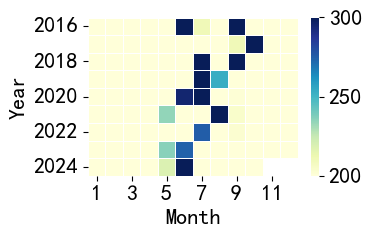

In [467]:
# 绘制热力图
plt.figure(figsize=(4, 2.65))
sns.heatmap(pivot_table.T*1e3, cmap='YlGnBu', linewidths=.5, annot=False, vmin=200, vmax=300)#, fmt=".1f"
plt.savefig(r'heatmap.pdf', dpi=300, pad_inches=0, bbox_inches='tight',transparent=True)
plt.show()

### TS_df_grouped

In [468]:
# 重新索引 Region_TS_df，使其与 PWV_TS_df 的索引对齐
PWV_TS_df.reindex(Region_TS_df.index)

Precipitation      East     North      Seto     SetoP     Tokyo      West  \
Date                                                                        
2016-01-15     0.148056  0.101705  0.083842  0.140166  0.103179  0.115735   
2016-02-15     0.125864  0.104582  0.076918  0.122805  0.081272  0.104096   
2016-03-15     0.116516  0.055836  0.090414  0.120529  0.133974  0.114199   
2016-04-15     0.171563  0.109310  0.188520  0.220984  0.117063  0.212981   
2016-05-15     0.143220  0.091366  0.176936  0.233951  0.125157  0.236465   
...                 ...       ...       ...       ...       ...       ...   
2024-05-15     0.215061  0.111950  0.218429  0.234573  0.218575  0.224580   
2024-06-15     0.304498  0.097886  0.334672  0.360299  0.356494  0.392291   
2024-07-15     0.246991  0.184747  0.197238  0.216590  0.135543  0.216736   
2024-08-15     0.187819  0.178490  0.167925  0.264021  0.191989  0.228518   
2024-09-15     0.163533  0.113289  0.070418  0.123127  0.126923  0.103922   

Precipitation  Year  Month  
Date                        
2016-01-15     2016      1  
2016-02-15     2016      2  
2016-03-15     2016      3  
2016-04-15     2016      4  
2016-05-15     2016      5  
...             ...    ...  
2024-05-15     2024      5  
2024-06-15     2024      6  
2024-07-15     2024      7  
2024-08-15     2024      8  
2024-09-15     2024      9  

[105 rows x 8 columns]

In [498]:
def Top_3_Month(group): 
    return  group.apply(lambda x: x.nlargest(3))
TopRainfall = PWV_TS_df.resample("AS").apply(Top_3_Month)
TopDebris = Region_TS_df.resample("AS").apply(Top_3_Month)
# TopRainfall[['West']].dropna().assign(Top_3_Month=lambda x: x.index.month)
TopDebris[['Tokyo']].dropna().assign(Top_3_Month=lambda x: x.index.year).sort_values(by='Tokyo',ascending=False)
# TopDebris

NAME               Tokyo  Top_3_Month
Date                                 
2017-10-15  1.175104e-06         2017
2023-01-15  6.038669e-07         2023
2022-02-15  3.161135e-07         2022
2021-12-15  2.838548e-07         2021
2022-12-15  2.624435e-07         2022
2023-12-15  2.352993e-07         2023
2023-02-15  2.230504e-07         2023
2016-01-15  0.000000e+00         2016
2020-03-15  0.000000e+00         2020
2024-02-15  0.000000e+00         2024
2024-01-15  0.000000e+00         2024
2022-01-15  0.000000e+00         2022
2021-02-15  0.000000e+00         2021
2021-01-15  0.000000e+00         2021
2020-02-15  0.000000e+00         2020
2016-02-15  0.000000e+00         2016
2020-01-15  0.000000e+00         2020
2019-03-15  0.000000e+00         2019
2019-02-15  0.000000e+00         2019
2019-01-15  0.000000e+00         2019
2018-03-15  0.000000e+00         2018
2018-02-15  0.000000e+00         2018
2018-01-15  0.000000e+00         2018
2017-02-15  0.000000e+00         2017
2017-01-15  0.000000e+00         2017
2016-03-15  0.000000e+00         2016
2024-03-15  0.000000e+00         2024

In [521]:
cars = ['Ford', 'BMW', 'Volvo']

cars.sort(reverse=True)

West: r=0.25, p=0.1994
y = 0.0063x + 0.2815
East: r=0.29, p=0.1436
y = 0.0090x + 0.1057
North: r=0.62, p=0.0005
y = 0.0087x + -0.7627
Seto: r=0.34, p=0.0824
y = 0.0276x + -0.3267
SetoP: r=0.58, p=0.0016
y = 0.0035x + -0.2102
Tokyo: r=0.63, p=0.0004
y = 0.0021x + -0.0836


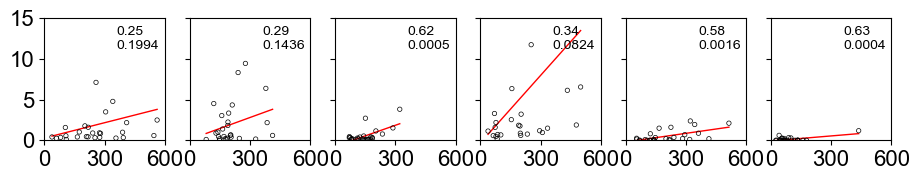

In [575]:
from scipy import stats

cols = ['West', 'East', 'North', 'Seto', 'SetoP', 'Tokyo']
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(9,1.6), sharex=True, sharey=True)

# 遍历每个国家并绘制子图
for ax, col in zip(axes, cols):
    x = PWV_TS_df[col].reindex(TopDebris.index) * 1e3
    y = TopDebris[col] * 1e6
    # Remove NaN and inf values
    mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
    x_clean = x[mask]
    y_clean = y[mask]
    
    res = stats.pearsonr(x_clean, y_clean)
    cor = round(res.statistic,2) 
    pvalue = round(res.pvalue,4) 
    
    # Fit a linear regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
    print(f"{col}: r={r_value:.2f}, p={p_value:.4f}")
    ax.plot(x_clean.sort_values()[[0,-1]], intercept + slope * x_clean.sort_values()[[0,-1]], lw=1,color='red', label=f'Fitted line (r={r_value:.2f})',zorder=1)
    ax.text(0.6,0.86,cor, fontsize=10, ha='left', transform=ax.transAxes)
    ax.text(0.6,0.75,pvalue, fontsize=10, ha='left', transform=ax.transAxes)
    print( f'y = {slope:.4f}x + {intercept:.4f}')
    ax.scatter(x, y, label=col, s=10,lw=0.5, alpha=1.0, edgecolors='k', facecolors='None')
    ax.set_ylim([0, 15])
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlim([0, 600])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
# plt.legend(loc='best', fontsize=16)

# 调整布局
# 移除子图的刻度标签以避免重叠
""" for ax in axes.flat:
    ax.label_outer() """
fig.tight_layout(pad=0)

plt.savefig(r'Scatter-Region_PWV_TS_df.pdf', dpi=300, pad_inches=0, bbox_inches='tight', transparent=True)

plt.show()

In [485]:
import numpy as np
from scipy import stats
x, y = [1, 2, 3, 4, 5, 6, 7], [10, 9, 2.5, 6, 4, 3, 2]
res = stats.pearsonr(x, y)
res

PearsonRResult(statistic=-0.828503883588428, pvalue=0.02128026000752328)

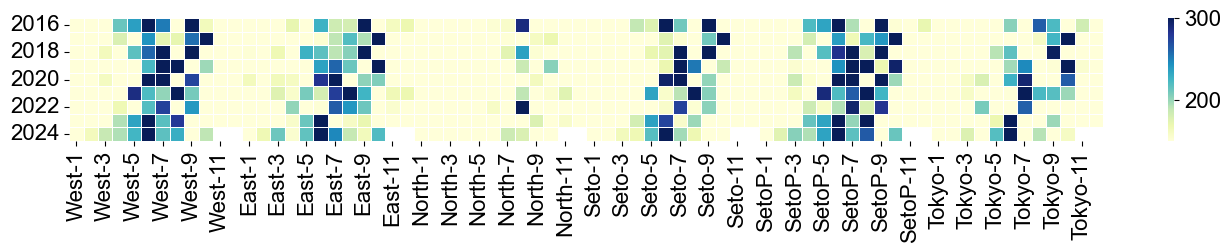

In [528]:
# 提取年份和月份
PWV_TS_df['Year'] = PWV_TS_df.index.year
PWV_TS_df['Month'] = PWV_TS_df.index.month

# 创建一个透视表，以便绘制热力图
PWV_pivot_table = PWV_TS_df.pivot_table(index='Year', columns='Month', aggfunc="first")[['West', 'East', 'North', 'Seto', 'SetoP', 'Tokyo']]*1e3

# 绘制热力图
plt.figure(figsize=(14, 2.8))
sns.heatmap(PWV_pivot_table, cmap='YlGnBu', linewidths=.5, annot=False, vmin=150, vmax=300)
plt.xlabel('')
plt.ylabel('')
plt.savefig(r'heatmap-Region_PWV_TS_df.pdf', dpi=300, pad_inches=0, bbox_inches='tight', transparent=True)
plt.show()


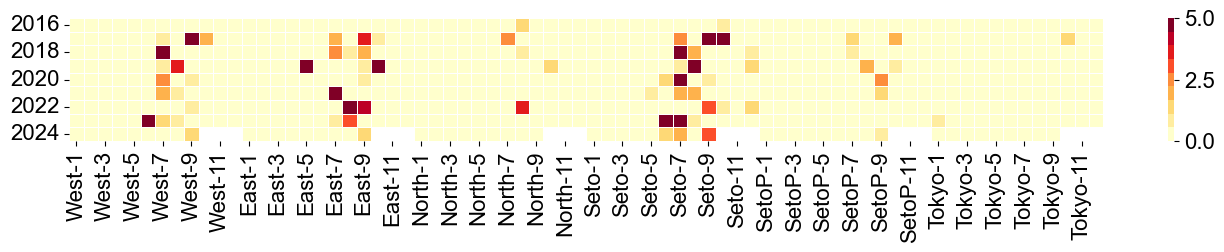

In [529]:
# 绘制热力图
from matplotlib.colors import ListedColormap

YlOrRdmap = ListedColormap(["#"+x for x in ["ffffcc","ffeda0","fed976","feb24c","fd8d3c","fc4e2a","e31a1c","bd0026","800026"]])

Region_TS_df

# 提取年份和月份
Region_TS_df['Year'] = Region_TS_df.index.year
Region_TS_df['Month'] = Region_TS_df.index.month

# 创建一个透视表，以便绘制热力图
Density_pivot_table = Region_TS_df.pivot_table(index='Year', columns='Month', aggfunc="first")[['West', 'East', 'North', 'Seto', 'SetoP', 'Tokyo']]*1e6

plt.figure(figsize=(14, 2.8))
sns.heatmap(Density_pivot_table, cmap=YlOrRdmap, linewidths=.5, annot=False, vmin=0, vmax=5)
# plt.title('Monthly Activity Heatmap for All Columns')
plt.xlabel('')
plt.ylabel('')
plt.savefig(r'heatmap-Region_TS_df.pdf', dpi=300, pad_inches=0, bbox_inches='tight',transparent=True)
plt.show()

In [352]:
Density_pivot_table

NAME       West                                                               \
Month        1         2         3         4         5         6          7    
Year                                                                           
2016   0.039075  0.000000  0.082645  0.000000  0.000000  0.000000   0.314735   
2017   0.105407  0.112892  0.000000  0.088713  0.059856  0.000000   1.017439   
2018   0.205916  0.351393  0.033216  0.111725  0.002401  0.159242  16.505557   
2019   0.269952  0.011150  0.033008  0.008461  0.079255  0.000000   0.985961   
2020   0.082816  0.062928  0.041434  0.004950  0.224176  0.269704   2.483881   
2021   0.010400  0.006345  0.000000  0.006159  0.227252  0.023507   1.768461   
2022   0.143104  0.110103  0.015168  0.000000  0.014055  0.000000   0.353686   
2023   0.000000  0.000000  0.011513  0.000000  0.011079  4.770549   1.595359   
2024   0.066320  0.000000  0.102280  0.000000  0.072701  0.326552   0.424039   

NAME                                 ... Tokyo                           \
Month        8         9         10  ...    3    4    5    6    7    8    
Year                                 ...                                  
2016   0.000000  0.000000  0.409409  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2017   0.350696  7.101759  2.162030  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2018   0.550704  0.023493  0.355256  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2019   3.483522  0.126295  0.217633  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2020   0.133358  0.907996  0.022951  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2021   0.579754  0.448209  0.312944  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2022   0.096044  0.890650  0.166999  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2023   0.850469  0.412879  0.026556  ...   0.0  0.0  0.0  0.0  0.0  0.0   
2024   0.113593  1.571157       NaN  ...   0.0  0.0  0.0  0.0  0.0  0.0   

NAME                                      
Month        9         10   11        12  
Year                                      
2016   0.000000  0.000000  0.0  0.000000  
2017   0.000000  1.175104  0.0  0.000000  
2018   0.000000  0.000000  0.0  0.000000  
2019   9.578732  1.596697  0.0  0.000000  
2020   0.000000  0.000000  0.0  0.000000  
2021   0.000000  0.000000  0.0  0.283855  
2022   0.000000  0.000000  0.0  0.262443  
2023   0.000000  0.000000  0.0  0.235299  
2024   0.000000       NaN  NaN       NaN  

[9 rows x 72 columns]

## Seto

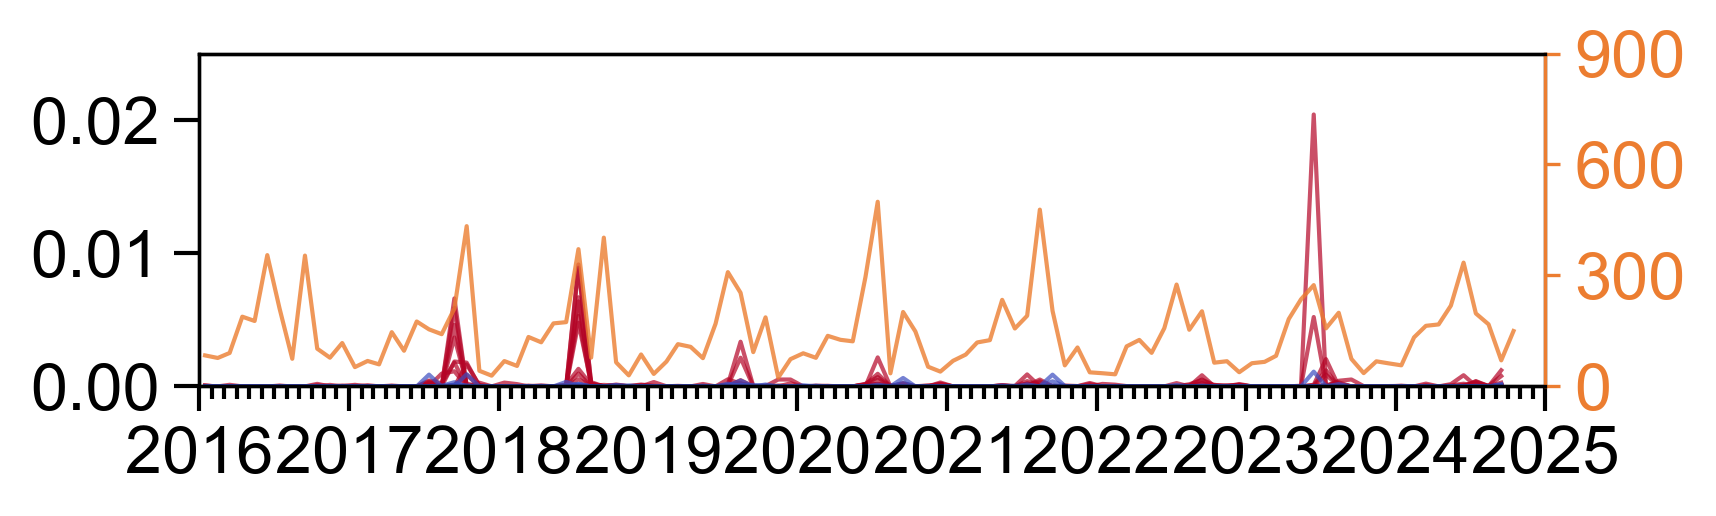

In [576]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)

#   coolwarm: {7:['#3B4CC0', '#6F91F2', '#A9C5FC', '#DDDDDD', '#F6B69B', '#E6745B', '#B40426']},
c2='#3B4CC0'
c1='#B40426'
seto_PCODE = ["JP" + str(x) for x in [40, 44, 35, 34, 33, 28, 27, 38, 37,36,39,32,31,45,30]]
seto = TS_df.query('ADM1_PCODE in @seto_PCODE')['ADM1_JA']

for i, column in enumerate(TS_df_grouped[seto].columns):
    # color = cmap(norm(i))
    if column in openness.values:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=1, color=c1,alpha=0.7, label=column)
    else:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=1,  color=c2,alpha=0.7, label=column)
        
# plt.yscale("log")

ax2 = ax.twinx()
ax2.plot(PWV_TS_df.index, PWV_TS_df['Seto']*1e3, color='#ec7d30', linewidth=1,alpha=0.8,  label='PWV_TS_df')
# ax2.set_ylabel('PWV_TS_df', color='green')
ax2.tick_params(axis='y', color='#ec7d30',labelcolor='#ec7d30')
ax2.spines['right'].set_color('#ec7d30')
ax2.set_ylim([0, 900])
ax2.yaxis.set_major_locator(ticker.MultipleLocator(300))

ax.set_ylim([0, 0.025])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))

ax.set_xlim(pd.to_datetime(['2016-01-01', '2025-01-01']))
# ax.set_zorder(1)  # default zorder is 0 for ax1 and ax2
# ax.set_frame_on(False)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(range(1, 13)))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)
ax.tick_params(axis='both', which='major', length=6,width=1)
ax.tick_params(axis='both', which='minor', length=3,width=1)
	
plt.tight_layout()
# plt.savefig(os.path.join(out_dir, 'debris_sum_by_region.png'), dpi=300)

# Save the figure with 300 dpi
# plt.savefig(r'Fig.png', dpi=300, pad_inches=0, bbox_inches='tight')
plt.savefig(r'Fig_debris03.pdf', dpi=300, pad_inches=0, bbox_inches='tight',transparent=True)
plt.show()

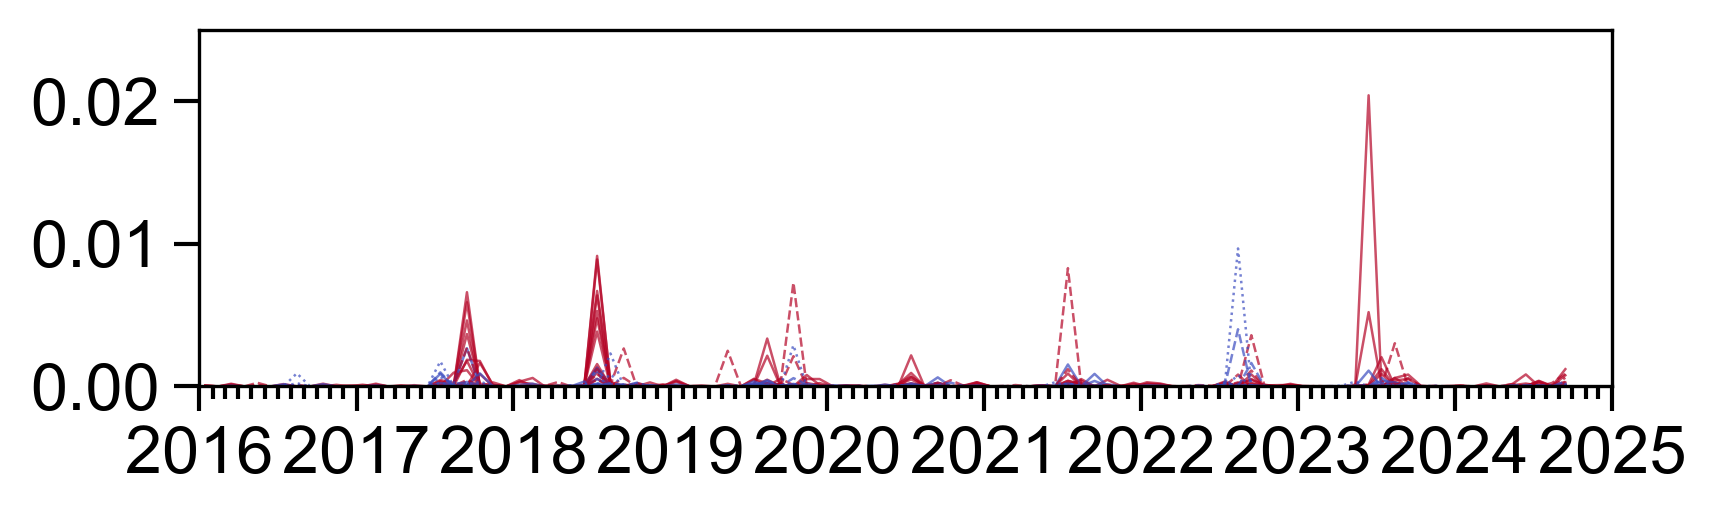

In [577]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)

#   coolwarm: {7:['#3B4CC0', '#6F91F2', '#A9C5FC', '#DDDDDD', '#F6B69B', '#E6745B', '#B40426']},
c2='#3B4CC0'
c1='#B40426'
lw=0.6
alpha=0.7
seto_PCODE = ["JP" + str(x) for x in [40, 44, 35, 34, 33, 28, 27, 38, 37,36,39,32,31,45,30]]
seto = TS_df.query('ADM1_PCODE in @seto_PCODE')['ADM1_JA']

""" # Seto [['愛媛県','香川県','高知県','徳島県']]
for i, column in enumerate(TS_df_grouped[seto].columns):
    # color = cmap(norm(i))
    if column in openness.values:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=1, color=c1,alpha=0.7, label=column)
    else:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=1,  color=c2,alpha=0.7, label=column) """
        
        
#West
# Plot the West region with gradient colors
for i, column in enumerate(TS_df_grouped[West].columns):
    # color = cmap(norm(i))
    if column in openness.values:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=lw, color=c1,alpha=alpha, label=column)
    else:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=lw,  color=c2,alpha=alpha, label=column)
        
 #East      
for column in TS_df_grouped[East].columns:
    if column in openness.values:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=lw,color=c1,alpha=alpha, ls='--', label=column)
    else:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=lw,color=c2,alpha=alpha, ls='--', label=column) 

#North
for column in TS_df_grouped[North].columns:
    if column in openness.values:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=lw,color=c1,alpha=alpha, ls=':', label=column)
    else:
        ax.plot(TS_df_grouped.index, TS_df_grouped[column]*1e2, linewidth=lw,color=c2,alpha=alpha, ls=':', label=column) 


ax.set_ylim([0, 0.025])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.set_xlim(pd.to_datetime(['2016-01-01', '2025-01-01']))
# ax.set_zorder(1)  # default zorder is 0 for ax1 and ax2
# ax.set_frame_on(False)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(range(1, 13)))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)
ax.tick_params(axis='both', which='major', length=6,width=1)
ax.tick_params(axis='both', which='minor', length=3,width=1)
	
plt.tight_layout()
# plt.savefig(os.path.join(out_dir, 'debris_sum_by_region.png'), dpi=300)

# Save the figure with 300 dpi
# plt.savefig(r'Fig.png', dpi=300, pad_inches=0, bbox_inches='tight')
plt.savefig(r'Fig_debrisTS-All.pdf', dpi=300, pad_inches=0, bbox_inches='tight',transparent=True)
plt.show()

## Hist

In [580]:
population = pd.read_csv("population_density_stats.csv", usecols=['mean', 'ADM1_EN', 'ADM1_PCODE', 'ADM1_JA'])
PWVTop = pd.read_csv("PWVTop3Image_stats.csv", usecols=['mean', 'ADM1_EN', 'ADM1_PCODE', 'ADM1_JA'])
Histdf = pd.read_csv("Hist_stats.csv", usecols=['mean', 'ADM1_EN', 'ADM1_PCODE', 'ADM1_JA'])
# TSdf = pd.read_csv("TS_stats.csv", usecols=['mean', 'ADM1_EN', 'ADM1_PCODE', 'ADM1_JA'])


Histdf = (
    Histdf
    .merge(population[['ADM1_PCODE', 'mean']], on='ADM1_PCODE', suffixes=('', '_population'))
    .merge(PWVTop[['ADM1_PCODE', 'mean']], on='ADM1_PCODE', suffixes=('', '_PWVTop'))
    .rename(columns={'mean':'density','mean_population': 'population', 'mean_PWVTop': 'PWVTop'})
)
Histdf['seto'] = Histdf['ADM1_JA'].apply(lambda x: 1 if x in seto.to_list() else 0)


Histdf['region'] = Histdf.apply(assign_region, axis=1)
Histdf['openness'] = Histdf.apply(assign_openness, axis=1)
Histdf.sort_values(by='density', inplace=True)
Histdf


density     ADM1_EN ADM1_PCODE ADM1_JA   population    PWVTop  seto  \
1   4.988006e-08       Chiba       JP12     千葉県  1122.857549  0.239905     0   
34  7.554472e-08     Shimane       JP32     島根県   141.400466  0.291688     1   
19  7.958070e-08     Ibaraki       JP08     茨城県   501.008617  0.217954     0   
26  1.057878e-07       Iwate       JP03     岩手県    94.543384  0.199684     0   
6   1.074851e-07       Tokyo       JP13     東京都  6732.413187  0.268432     0   
27  1.358299e-07      Miyagi       JP04     宮城県   324.481132  0.216885     0   
30  1.409707e-07       Kōchi       JP39     高知県   117.106236  0.411770     1   
36  1.421508e-07     Tottori       JP31     鳥取県   202.080478  0.303310     1   
25  1.439320e-07    Hokkaido       JP01     北海道    72.084750  0.179215     0   
37  1.542006e-07    Wakayama       JP30    和歌山県   225.396186  0.354992     1   
32  1.817849e-07    Miyazaki       JP45     宮崎県   151.432652  0.399656     1   
4   1.866477e-07    Kanagawa       JP14    神奈川県  3473.764292  0.279402     0   
29  2.303157e-07   Kagoshima       JP46    鹿児島県   239.370469  0.414701     0   
35  2.364850e-07   Tokushima       JP36     徳島県   203.380559  0.373387     1   
20  3.200492e-07         Mie       JP24     三重県   326.173801  0.343118     0   
23  3.637516e-07      Aomori       JP02     青森県   156.785971  0.198067     0   
24  4.387583e-07   Fukushima       JP07     福島県   156.637379  0.233653     0   
22  4.530644e-07       Akita       JP05     秋田県   103.835482  0.237393     0   
0   4.941399e-07       Aichi       JP23     愛知県  1378.857835  0.328549     0   
33  5.109475e-07    Nagasaki       JP42     長崎県   463.096735  0.344578     0   
5   5.627966e-07    Shizuoka       JP22     静岡県   492.454132  0.388936     0   
21  5.987592e-07     Niigata       JP15     新潟県   208.282704  0.297158     0   
31  7.794018e-07       Kyoto       JP26     京都府   575.615643  0.288720     0   
14  8.606999e-07        Ōita       JP44     大分県   191.214551  0.318414     1   
18  8.955523e-07   Yamaguchi       JP35     山口県   250.432303  0.306002     1   
11  8.956295e-07       Hyōgo       JP28     兵庫県   653.734074  0.296746     1   
3   9.054585e-07    Ishikawa       JP17     石川県   283.892630  0.309115     0   
17  1.011264e-06        Saga       JP41     佐賀県   370.050830  0.315549     0   
9   1.105500e-06     Fukuoka       JP40     福岡県  1009.137456  0.301707     1   
28  1.123201e-06    Yamagata       JP06     山形県   135.173879  0.263677     0   
15  1.347080e-06     Okayama       JP33     岡山県   274.847239  0.287342     1   
12  1.379873e-06      Kagawa       JP37     香川県   540.220834  0.276152     1   
13  1.434862e-06    Kumamoto       JP43     熊本県   252.721703  0.375228     0   
8   1.586685e-06       Ehime       JP38     愛媛県   254.318584  0.330487     1   
10  1.616227e-06   Hiroshima       JP34     広島県   333.988759  0.299470     1   
7   1.868155e-06      Toyama       JP16     富山県   265.340947  0.362477     0   
2   2.066220e-06       Fukui       JP18     福井県   200.654752  0.349851     0   
16  2.232088e-06       Osaka       JP27     大阪府  4706.878090  0.267802     1   

   region openness  
1    East   Closed  
34   West     Open  
19   East     Open  
26  North     Open  
6    East   Closed  
27  North     Open  
30   West     Open  
36   West     Open  
25  North     Open  
37   West     Open  
32   West     Open  
4    East   Closed  
29   West     Open  
35   West     Open  
20   East     Open  
23  North     Open  
24  North     Open  
22  North     Open  
0    East   Closed  
33   West     Open  
5    East   Closed  
21   East     Open  
31   West     Open  
14   West   Closed  
18   West   Closed  
11   West   Closed  
3    East   Closed  
17   West   Closed  
9    West   Closed  
28  North     Open  
15   West   Closed  
12   West   Closed  
13   West   Closed  
8    West   Closed  
10   West   Closed  
7    East   Closed  
2    East   Closed  
16   West   Closed

In [267]:
color_palette = sns.color_palette("coolwarm", as_cmap=False)
print(color_palette.as_hex())

['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']


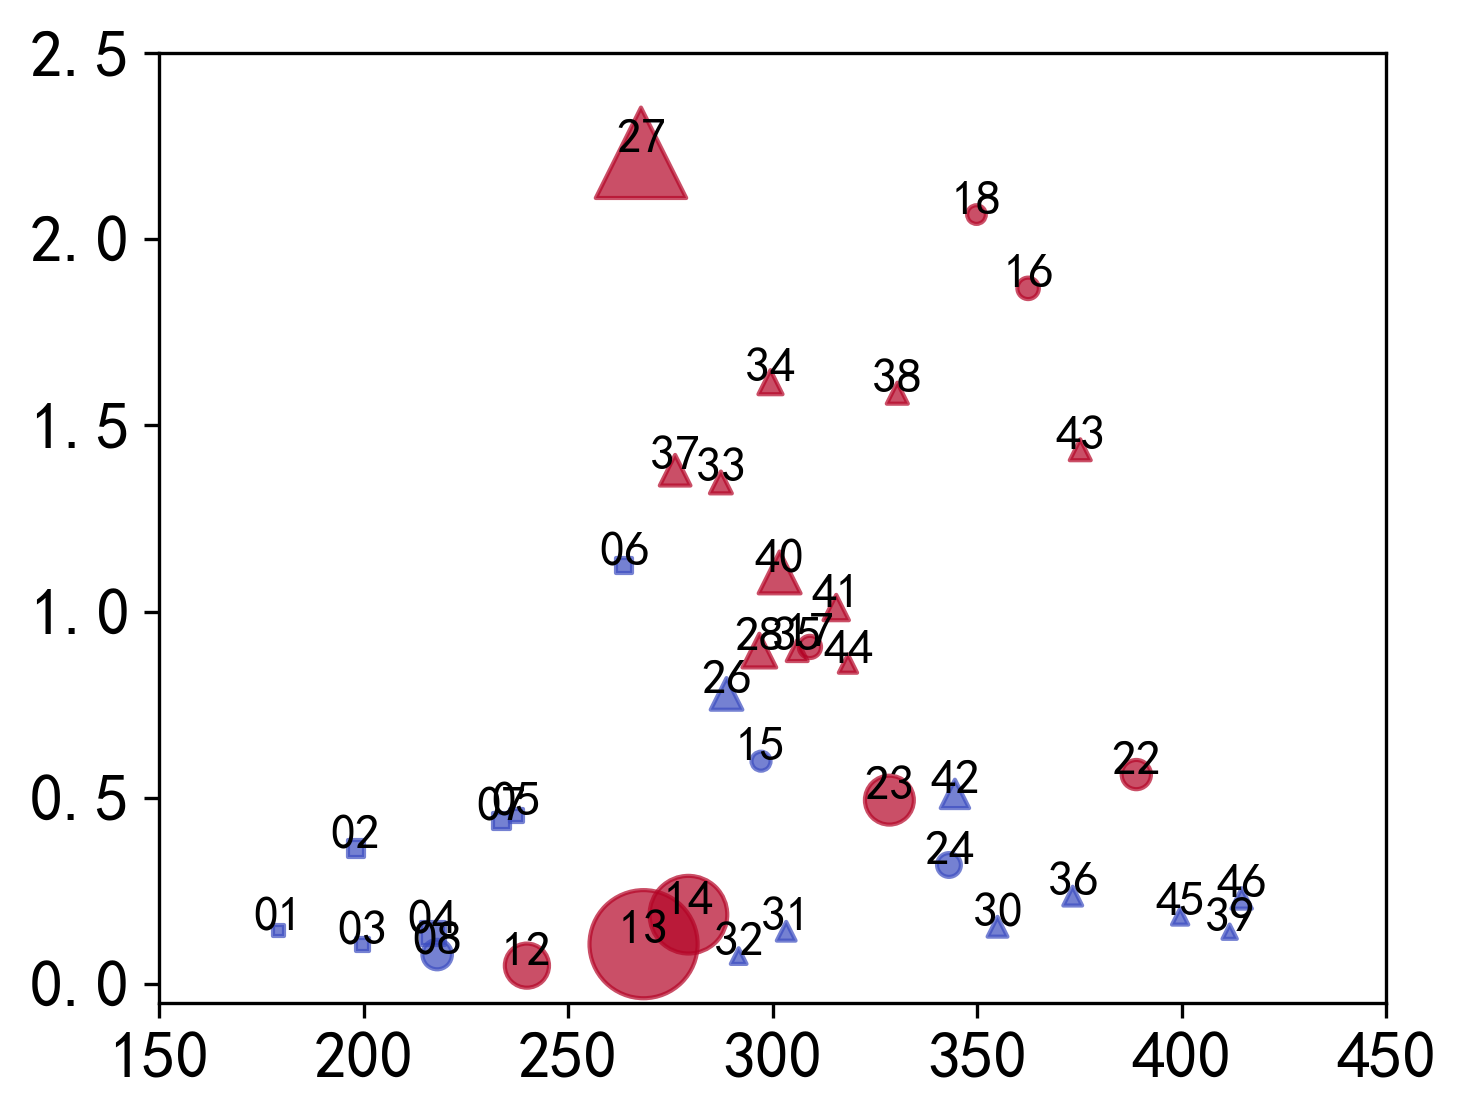

In [635]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

# Create a scatter plot
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(5, 4), dpi=300)

# Define marker shapes for each region
shapes = {'West': '^', 'East': 'o', 'North':'s', 'South':'o'}
cmap = ListedColormap(['#B40426','#3B4CC0'])

# Plot each region with a different marker
for region, shape in shapes.items():
    subset = Histdf[Histdf['region'] == region]
    plt.scatter(subset['PWVTop']*1e3, subset['density']*1e6,
    c=subset['openness'].apply(lambda x: 1 if x == 'Open' else 0), cmap=cmap, 
    vmin=0, vmax=1, 
    s=subset['population']/10, alpha=0.7, marker=shape, label=f'openness {openness}')

# Add text labels for each point
for i, row in Histdf.iterrows():
    plt.text(row['PWVTop']*1e3, row['density']*1e6, row['ADM1_PCODE'][2:], fontsize=12, ha='center')
    
# Add centroid scatter for seto == 1
seto_subset = Histdf[Histdf['seto'] == 1]
# plt.scatter(seto_subset['PWVTop']*1e3, seto_subset['density']*1e6,c='black', s=10, alpha=0.7, marker='o')

plt.xlim([150,450])
plt.ylim([-0.05,2.5])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Add labels and title
# plt.xlabel('PWVTop')
# plt.ylabel('density')
# plt.title('Scatter plot of PWVTop vs density')


# 调整布局
plt.tight_layout()

    
# Save the figure with 300 dpi
# plt.savefig(r'Fig.png', dpi=300, pad_inches=0, bbox_inches='tight')
plt.savefig(r'Fig_debris01.pdf', dpi=300, pad_inches=0, bbox_inches='tight',transparent=True)

# 显示图形
plt.show()

In [316]:
# Create a scatter plot
from matplotlib.colors import ListedColormap

plt.figure(figsize=(6, 4), dpi=300)
# Define marker shapes for each region
shapes = {0: '^', 1: 'o', 2:'s', 3:'o'}
cmap = ListedColormap(['#3B4CC0', '#B40426'])

# Plot each region with a different marker
for region, shape in shapes.items():
    subset = Histdf[Histdf['region'] == region]
    plt.scatter(subset['PWVTop']*1e3, subset['density']*1e6, c=subset['openness'], cmap=cmap, 
    vmin=0, vmax=1, 
    s=subset['population']/10, alpha=0.7, marker=shape, label=f'openness {openness}')

# Add centroid scatter for seto == 1
seto_subset = Histdf[Histdf['seto'] == 1]
# plt.scatter(seto_subset['PWVTop']*1e3, seto_subset['density']*1e6,c='black', s=10, alpha=0.7, marker='o')

# Add text labels for each point
for i, row in Histdf.iterrows():
    plt.text(row['PWVTop']*1e3, row['density']*1e6, row['ADM1_JA'], fontsize=8, ha='center')
    


# Add labels and title
plt.xlabel('PWVTop')
plt.ylabel('density')
plt.title('Scatter plot of PWVTop vs density')


# 调整布局
plt.tight_layout()


# Save the figure with 300 dpi
# plt.savefig(r'Fig.png', dpi=300, pad_inches=0, bbox_inches='tight')
# plt.savefig(r'Fig_debris.pdf', dpi=300, pad_inches=0, bbox_inches='tight',transparent=True)

# 显示图形
plt.show()

ValueError: Image size of 5260255x19452 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x1200 with 1 Axes>

## get_image_collection_thumbnails

In [ ]:
vis_collection = collection.map(lambda img: dem.blend(img.visualize(**vis_params).clip(region)))

In [ ]:
geemap.get_image_collection_thumbnails(
    vis_collection, out_dir, {}, region=collection.first().geometry(),dimensions=3000, format="png"
)

Total number of images: 22



# Year Month Hist

## with PWV rivers

### All his

In [ ]:
# Function to render and save image as PNG
@retry(tries=10, delay=1, backoff=2)
def render_image(image_id):
    image = ee.Image(collection.filter(ee.Filter.eq('system:index', image_id)).first())
    filename = f'{image_id}.tif'
    # 32 M limitaion
    geemap.download_ee_image(
        dem
        .blend(PWVTop3Image.visualize(**{
                                  'min': 0.05,
                                  'max': 0.5, 
                                  'palette':LightBlue_palette
                                }))
        .blend(styled_japanRivers)
        .blend(styled_populatedPlaces)
        .blend(image.visualize(**{'min':0,'max':0.5e-5,'palette':YlOrRd}).clip(region)),
        filename=filename,
        scale=200,
        crs='EPSG:3857',
        region=collection.first().geometry() # image.geometry()
    )
    geemap.geotiff_to_image(filename, filename.replace('.tif', '.png'))
    os.remove(filename)

# Get list of image IDs
image_ids = collection.limit(1).aggregate_array('system:index').getInfo()

# Use joblib for parallel processing
Parallel(n_jobs=200,backend='threading')(
    delayed(render_image)(image_id) for image_id in image_ids
)

Asset-JAP-HistMean.tif: |          | 0.00/451M (raw) [  0.0%] in 00:00 (eta:     ?)

[None]

Asset-JAP-HistMean.tif: |          | 0.00/451M (raw) [  0.0%] in 00:00 (eta:     ?)

In [ ]:
# Function to render and save image as PNG
@retry(tries=10, delay=1, backoff=2)
def render_image(image_id):
    image = ee.Image(collection.filter(ee.Filter.eq('system:index', image_id)).first())
    filename = f'{image_id}.tif'
    # 32 M limitaion
    geemap.download_ee_image(
        population_density.visualize(**{
                                  'min': 100,
                                  'max': 1000, 
                                  'palette':LightBlue_palette
                                })
        # .blend(styled_japanRivers)
        # .blend(styled_populatedPlaces)
        .blend(image.visualize(**{'min':0,'max':0.5e-5,'palette':YlOrRd}).clip(region)),
        filename=filename,
        scale=200,
        crs='EPSG:3857',
        region=collection.first().geometry() # image.geometry()
    )
    geemap.geotiff_to_image(filename, filename.replace('.tif', '.png'))
    os.remove(filename)

# Get list of image IDs
image_ids = collection.limit(1).aggregate_array('system:index').getInfo()

# Use joblib for parallel processing
Parallel(n_jobs=200,backend='threading')(
    delayed(render_image)(image_id) for image_id in image_ids
)

Asset-JAP-HistMean.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

[None]

### Monthly

In [ ]:
# Function to render and save image as PNG
@retry(tries=10, delay=1, backoff=2)
def render_image(image_id):
    image = ee.Image(Month.filter(ee.Filter.eq('system:index', image_id)).first())
    filename = f'{image_id}.tif'
    # 32 M limitaion
    geemap.download_ee_image(
        dem
        .blend(PWV.filterMetadata("system:index", "contains",image_id[-8:]).first().visualize(**{
                                  'min': 0.00,
                                  'max': 0.5, 
                                  'palette':LightBlue_palette
                                }))
        # .blend(styled_japanRivers)
        # .blend(styled_populatedPlaces)
        .blend(image.visualize(**vis_params).clip(region)),
        filename=filename,
        scale=200,
        crs='EPSG:3857',
        region=Month.first().geometry() 
    )
    geemap.geotiff_to_image(filename, filename.replace('.tif', '.png'))
    os.remove(filename)

# Get list of image IDs
image_ids = Month.aggregate_array('system:index').getInfo()

# Use joblib for parallel processing
Parallel(n_jobs=200,backend='threading')(
    delayed(render_image)(image_id) for image_id in image_ids
)

Asset-JAP-Month-01.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-06.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-11.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-08.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-07.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-02.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-05.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-12.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-09.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-10.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-04.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Month-03.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

[None, None, None, None, None, None, None, None, None, None, None, None]

### Yearly

In [ ]:
# Function to render and save image as PNG
@retry(tries=10, delay=1, backoff=2)
def render_image(image_id):
    image = ee.Image(Year.filter(ee.Filter.eq('system:index', image_id)).first())
    filename = f'{image_id}.tif'
    # 32 M limitaion
    geemap.download_ee_image(
        dem
        .blend(PWV.filterMetadata("system:index", "contains",image_id[-4:]).first().visualize(**vis_params_precip))
        # .blend(styled_japanRivers)
        # .blend(styled_populatedPlaces)
        .blend(image.visualize(**vis_params).clip(region)),
        filename=filename,
        scale=200,
        crs='EPSG:3857',
        region=Year.first().geometry() 
    )
    geemap.geotiff_to_image(filename, filename.replace('.tif', '.png'))
    os.remove(filename)

# Get list of image IDs
image_ids = Year.aggregate_array('system:index').getInfo()

# Use joblib for parallel processing
Parallel(n_jobs=100,backend='threading')(
    delayed(render_image)(image_id) for image_id in image_ids
)

Asset-JAP-Year-2017.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2020.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2019.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2021.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2022.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2018.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2024.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2016.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

Asset-JAP-Year-2023.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

[None, None, None, None, None, None, None, None, None]

### Seto July

### Mean

In [ ]:
# Function to render and save image as PNG
@retry(tries=10, delay=1, backoff=2)
def render_image(image_id):
    image = ee.Image(July.filter(ee.Filter.eq('system:index', image_id)).first())
    filename = f'{image_id}.tif'
    # 32 M limitaion
    geemap.download_ee_image(
        dem
        .blend(PWVJuly.visualize(**vis_params_precip))
        .blend(styled_japanRivers)
        # .blend(styled_populatedPlaces)
        .blend(image.visualize(**vis_params_July).clip(region)),
        filename=filename,
        scale=200,
        crs='EPSG:3857',
        region=July.first().geometry() # image.geometry()
    )
    geemap.geotiff_to_image(filename, filename.replace('.tif', '.png'))
    os.remove(filename)

# Get list of image IDs
image_ids = July.limit(1).aggregate_array('system:index').getInfo()

# Use joblib for parallel processing
Parallel(n_jobs=200,backend='threading')(
    delayed(render_image)(image_id) for image_id in image_ids
)

Asset-Seto-JulyMean.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

[None]

### DOY

In [ ]:
# Function to render and save image as PNG
@retry(tries=10, delay=1, backoff=2)
def render_image(image_id):
    image = ee.Image(July.filter(ee.Filter.eq('system:index', image_id)).first())
    filename = f'{image_id}.tif'
    # 32 M limitaion
    geemap.download_ee_image(
        dem
        # .blend(PWVJuly.visualize(**vis_params_precip))
        # .blend(styled_japanRivers)
        # .blend(styled_populatedPlaces)
        .blend(image.visualize(**vis_params_July).clip(region)),
        filename=filename,
        scale=200,
        crs='EPSG:3857',
        region=July.first().geometry() # image.geometry()
    )
    geemap.geotiff_to_image(filename, filename.replace('.tif', '.png'))
    os.remove(filename)

# Get list of image IDs
image_ids = July.limit(1).aggregate_array('system:index').getInfo()

# Use joblib for parallel processing
Parallel(n_jobs=200,backend='threading')(
    delayed(render_image)(image_id) for image_id in image_ids
)

Asset-JAP-HistMean.tif: |          | 0.00/452M (raw) [  0.0%] in 00:00 (eta:     ?)

[None]

In [ ]:
JAPCoastZone = ee.FeatureCollection('projects/zhuxiaobo/assets/NaturalEarth/JAPCoastZone')

# # Add the GeoJSON layer to the map
# Map.addLayer(JAPCoastZone, {}, 'JAPCoastZone Layer')
# Map.centerObject(JAPCoastZone)
# Map


In [90]:
JAPCoastZone.geometry()

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Collection.geometry",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.loadTable",
          "arguments": {
            "tableId": {
              "constantValue": "projects/zhuxiaobo/assets/NaturalEarth/JAPCoastZone"
            }
          }
        }
      }
    }
  }
})

In [92]:
# out_dir = os.path.join(os.path.expanduser("~"), "Downloads")
# out_dem_stats = os.path.join(out_dir, "JAPEuler_stats.csv")
out_dem_stats = os.path.join(out_dir, "JAPLagrange_stats.csv")

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics type: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, VARIANCE, SUM
# geemap.zonal_stats(Hist.unmask().clipToCollection(JAPCoastZone), JAPCoastZone, out_dem_stats, stat_type="MEAN", scale=1000)
geemap.zonal_stats(Hist, JAPCoastZone, out_dem_stats, stat_type="MEAN", scale=1000)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to E:\NJU\SciBull\Fig\JAP\JAPLagrange_stats.csv


## Download image by tile

In [37]:
Map = geemap.Map()

image = ee.Image("LANDSAT/LE7_TOA_5YEAR/1999_2003")

landsat_vis = {"bands": ["B4", "B3", "B2"], "gamma": 2}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 1)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [38]:
region = ee.Geometry.BBox(-115.6339, 35.7529, -113.9338, 36.7012)
Map.centerObject(region)

In [39]:
features = geemap.fishnet(region, rows=2, cols=2)
Map.addLayer(features, {}, "Grids")

In [41]:
geemap.download_ee_image_tiles(
    image, features, out_dir, prefix="landsat_", crs="EPSG:3857", scale=30
)

landsat_1.tif: |          | 0.00/48.0M (raw) [  0.0%] in 00:00 (eta:     ?)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [474]:
population_density = ee.ImageCollection('CIESIN/GPWv411/GPW_Population_Density').first().select('population_density')
Map.addLayer(population_density.clip(japan), {'min': 0, 'max': 1000, 'palette': YlOrRd}, 'Population Density')
Map.centerObject(japan)
Map

Map(bottom=26092.0, center=[35.746512259918504, 138.96606445312503], controls=(WidgetControl(options=['positio…

In [87]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron")
fig.show()

In [88]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron", hover_name="district",
    color="winner", size="total", size_max=15,
    color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"} )
fig.show()

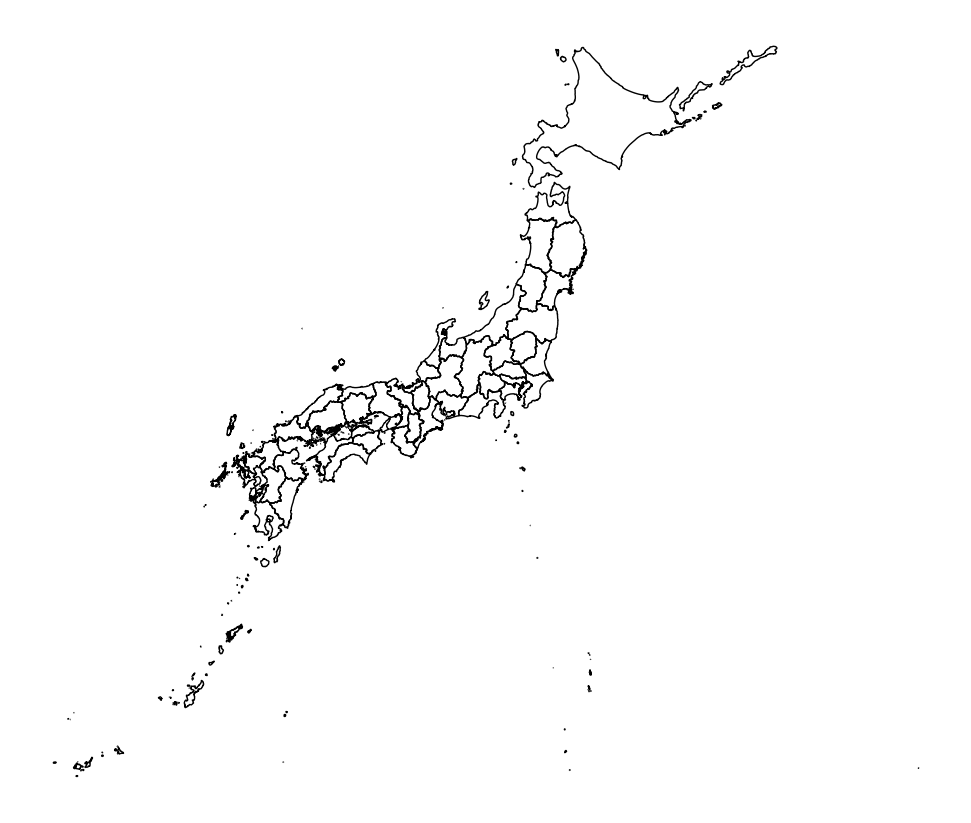

In [633]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Read the shapefile
japan_shapefile =( gpd.read_file(r'E:\NJU\SciBull\Fig\JAP\ZonalStatistics\jpn_adm_2019_shp\jpn_admbnda_adm1_2019.shp')    
.assign(region=lambda df: df.apply(assign_region, axis=1))
.assign(openness=lambda df: df.apply(assign_openness, axis=1)))
# JAPCoastZone = gpd.read_file(r'E:\NJU\SciBull\Fig\JAP\ZonalStatistics\JAPCoastZone.shp').merge(Histdf[['ADM1_PCODE','region','openness']], on='ADM1_PCODE',how='left')
# JAPCoastZone.to_file(r'E:\NJU\SciBull\Fig\JAP\ZonalStatistics\jpn_adm_2019_shp\JAPCoastZone.shp',encoding='utf-8')

# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
japan_shapefile.plot(ax=ax, color='None', edgecolor='black')
japan_shapefile.to_file(r'E:\NJU\SciBull\Fig\JAP\ZonalStatistics\jpn_adm_2019_shp\jpn_admbnda_adm1_2019_DIY.shp',encoding='utf-8')

# Remove axis
ax.axis('off')

# Save the plot as a transparent PNG
plt.savefig('japan_map.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [628]:
japan_shapefile

ADM0_EN ADM0_JA ADM0_PCODE     ADM1_EN ADM1_JA ADM1_PCODE  code  \
0    Japan      日本         JP       Aichi     愛知県       JP23    23   
1    Japan      日本         JP       Akita     秋田県       JP05     5   
2    Japan      日本         JP      Aomori     青森県       JP02     2   
3    Japan      日本         JP       Chiba     千葉県       JP12    12   
4    Japan      日本         JP       Ehime     愛媛県       JP38    38   
5    Japan      日本         JP       Fukui     福井県       JP18    18   
6    Japan      日本         JP     Fukuoka     福岡県       JP40    40   
7    Japan      日本         JP   Fukushima     福島県       JP07     7   
8    Japan      日本         JP        Gifu     岐阜県       JP21    21   
9    Japan      日本         JP       Gunma     群馬県       JP10    10   
10   Japan      日本         JP   Hiroshima     広島県       JP34    34   
11   Japan      日本         JP    Hokkaido     北海道       JP01     1   
12   Japan      日本         JP       Hyōgo     兵庫県       JP28    28   
13   Japan      日本         JP     Ibaraki     茨城県       JP08     8   
14   Japan      日本         JP    Ishikawa     石川県       JP17    17   
15   Japan      日本         JP       Iwate     岩手県       JP03     3   
16   Japan      日本         JP      Kagawa     香川県       JP37    37   
17   Japan      日本         JP   Kagoshima    鹿児島県       JP46    46   
18   Japan      日本         JP    Kanagawa    神奈川県       JP14    14   
19   Japan      日本         JP       Kōchi     高知県       JP39    39   
20   Japan      日本         JP    Kumamoto     熊本県       JP43    43   
21   Japan      日本         JP       Kyoto     京都府       JP26    26   
22   Japan      日本         JP         Mie     三重県       JP24    24   
23   Japan      日本         JP      Miyagi     宮城県       JP04     4   
24   Japan      日本         JP    Miyazaki     宮崎県       JP45    45   
25   Japan      日本         JP      Nagano     長野県       JP20    20   
26   Japan      日本         JP    Nagasaki     長崎県       JP42    42   
27   Japan      日本         JP        Nara     奈良県       JP29    29   
28   Japan      日本         JP     Niigata     新潟県       JP15    15   
29   Japan      日本         JP        Ōita     大分県       JP44    44   
30   Japan      日本         JP     Okayama     岡山県       JP33    33   
31   Japan      日本         JP     Okinawa     沖縄県       JP47    47   
32   Japan      日本         JP       Osaka     大阪府       JP27    27   
33   Japan      日本         JP        Saga     佐賀県       JP41    41   
34   Japan      日本         JP     Saitama     埼玉県       JP11    11   
35   Japan      日本         JP       Shiga     滋賀県       JP25    25   
36   Japan      日本         JP     Shimane     島根県       JP32    32   
37   Japan      日本         JP    Shizuoka     静岡県       JP22    22   
38   Japan      日本         JP     Tochigi     栃木県       JP09     9   
39   Japan      日本         JP   Tokushima     徳島県       JP36    36   
40   Japan      日本         JP       Tokyo     東京都       JP13    13   
41   Japan      日本         JP     Tottori     鳥取県       JP31    31   
42   Japan      日本         JP      Toyama     富山県       JP16    16   
43   Japan      日本         JP    Wakayama    和歌山県       JP30    30   
44   Japan      日本         JP    Yamagata     山形県       JP06     6   
45   Japan      日本         JP   Yamaguchi     山口県       JP35    35   
46   Japan      日本         JP   Yamanashi     山梨県       JP19    19   

                                             geometry region openness  
0   MULTIPOLYGON (((137.00719 34.67810, 137.00506 ...   East   Closed  
1   MULTIPOLYGON (((139.87633 39.11970, 139.86987 ...  South     Open  
2   MULTIPOLYGON (((141.52791 40.54101, 141.52423 ...  South     Open  
3   MULTIPOLYGON (((140.11286 35.57128, 140.10691 ...   East   Closed  
4   MULTIPOLYGON (((132.55887 32.93409, 132.56388 ...   West   Closed  
5   MULTIPOLYGON (((136.06653 35.66446, 136.06244 ...   East   Closed  
6   MULTIPOLYGON (((130.13217 33.55678, 130.12714 ...   West   Closed  
7   MULTIPOLYGON (((140.94816 37.85372, 140.94980 ...  South     O

In [ ]:
filename = 
geemap.geotiff_to_image(filename, filename.replace('.tif', '.png'))
